In [284]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


In [285]:
df = pd.read_csv("../dataset/train.csv")

In [286]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

treshold = 0.5
missing_ratio = missing_values / len(df)

less = missing_values[(missing_ratio < treshold) & (missing_values > 0)].index
over = missing_values[missing_ratio > treshold].index

numeric_features = df[less].select_dtypes(include="number").columns
kategorical_features = df[less].select_dtypes(include="object").columns

df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

for column in kategorical_features:
    df[column] = df[column].fillna(df[column].mode() [0])

df =df.drop(columns=over)

missing_values = df.isnull().sum()
missing_values[missing_values > 0]



Series([], dtype: int64)

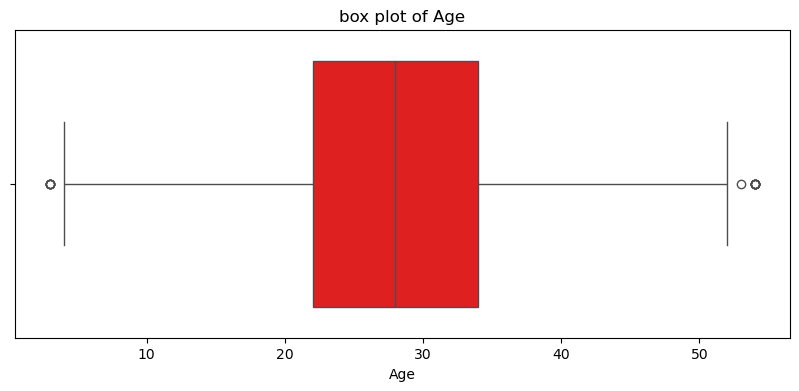

In [287]:
numeric_features = ["Age"]


if len(numeric_features) > 0 :
    Q1 = df[numeric_features].quantile(0.25)
    Q3 = df[numeric_features].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    condition = ~((df[numeric_features] < lower_fence) | (df[numeric_features] > upper_fence)).any(axis=1)
    df = df.loc[condition]


for features in numeric_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[features], color="red")
    plt.title(f"box plot of {features}")


Text(0.5, 1.0, 'Histogram Sesudah Standardisasi')

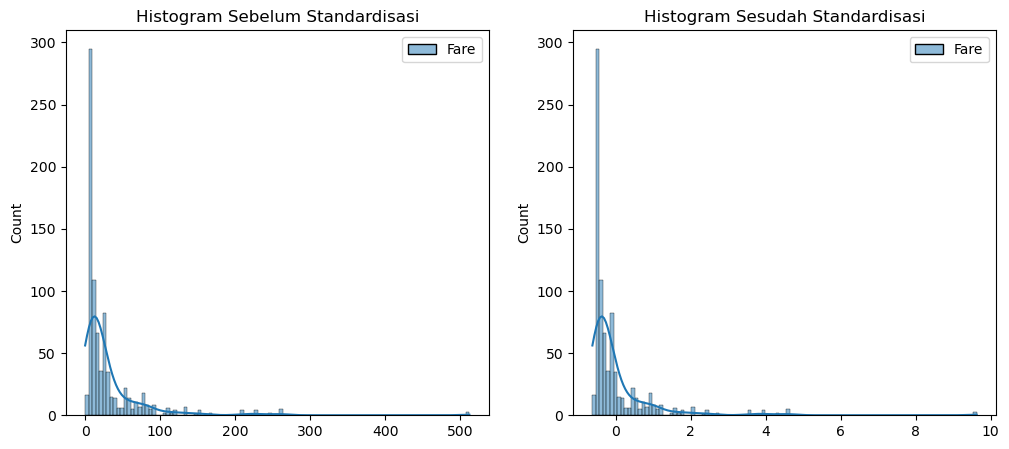

In [288]:
numeric_features = ["Fare"]
scaler = StandardScaler()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_features], kde=True)
plt.title("Histogram Sebelum Standardisasi")

df[numeric_features] = scaler.fit_transform(df[numeric_features])

plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features], kde=True)
plt.title("Histogram Sesudah Standardisasi")



In [ ]:
duplicates = df.duplicated()

print(df[duplicates])

# tidak ada data duplikate pada output tapi jika ada maka begini caranya :
df = df.drop_duplicates()
# hapus file duplicate

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []
